In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Loading

In [2]:
# Genres to Categories Dictionary
genre_categories_dict = {1 : ['acoustic','singer-songwriter','songwriter','folk'],
2 : ['alternative','alt-rock'],
3 : ['ambient','study','sleep','new-age'],
4 : ['brazil','samba','pagode','sertanejo','tango','forro','mpb'],
5 : ['british'],
6 : ['classical'],
7 : ['comedy'],
8 : ['country','honky-tonk'],
9 : ['indie','indie-pop'],
10 : ['french'],
11 : ['funk','disco'],
12 : ['gospel'],
13 : ['guitar'],
14 : ['happy'],
15 : ['hip-hop','trip-hop'],
16 : ['dubstep','dub','synth-pop','electro','electronic','breakbeat','industrial','garage',],
17 : ['progressive-house','house','deep-house','chicago-house','trance','techno','idm','edm','drum-and-bass','party','club','detroit-techno','minimal-techno'],
18 : ['metalcore','metal','death-metal','heavy-metal','black-metal','hardstyle','hardcore','grindcore'],
19 : ['j-dance','dancehall','dance'],
20 : ['j-idol','emo','punk','punk-rock','hard-rock','goth','grunge'],
21 : ['anime','j-rock','j-pop'],
22 : ['k-pop'],
23 : ['jazz','chill','groove','afrobeat','bluegrass'],
24 : ['blues','sad','soul'],
25 : ['kids','disney','children'],
26 : ['latin','latino','reggae','reggaeton','ska'],
27 : ['mandopop'],
28 : ['cantopop'],
29 : ['opera'],
30 : ['piano'],
31 : ['pop','power-pop','pop-film'],
32 : ['psych-rock','rock-n-roll','rock','rockabilly'],
33 : ['r-n-b'],
34 : ['romance'],
35 : ['salsa', 'spanish'],
36 : ['show-tunes'],
37 : ['world-music','turkish','swedish','iranian','indian','german','malay']}

In [3]:
#Load the data
df = pd.read_csv('dataset.csv')
df.drop(columns='Unnamed: 0', inplace=True)

In [4]:
df[df['popularity']==0]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
23,0BUuuEvNa5T4lMaewyiudB,Jason Mraz,Coffee Moment,93 Million Miles,0,216386,False,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,4,acoustic
24,3Hn3LfhrQOaKihdCibJsTs,Jason Mraz,Human - Best Adult Pop Tunes,Unlonely,0,231266,False,0.796,0.667,5,-4.831,0,0.0392,0.3810,0.000000,0.2210,0.754,97.988,4,acoustic
26,5IfCZDRXZrqZSm8AwE44PG,Jason Mraz,Holly Jolly Christmas,Winter Wonderland,0,131760,False,0.620,0.309,5,-9.209,1,0.0495,0.7880,0.000000,0.1460,0.664,145.363,4,acoustic
27,0dzKBptH2P5j5a0MifBMwM,Jason Mraz,Feeling Good - Adult Pop Favorites,If It Kills Me,0,273653,False,0.633,0.429,4,-6.784,0,0.0381,0.0444,0.000000,0.1320,0.520,143.793,4,acoustic
28,5QAMZTM5cmLg3fHX9ZbTZi,Jason Mraz,Christmas Time,Winter Wonderland,0,131760,False,0.620,0.309,5,-9.209,1,0.0495,0.7880,0.000000,0.1460,0.664,145.363,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113046,3W73vndiqDkaYwYjSMaSWu,Rend Collective,Santa's Christmas List,Ding Dong Merrily On High (The Celebration's S...,0,117226,False,0.696,0.715,7,-7.741,1,0.0314,0.3400,0.000000,0.1800,0.959,130.021,4,world-music
113047,18FIFh4AGPC2zDLLFkJp4j,Kim Walker-Smith,Santa's Christmas List,Rudolph The Red-Nosed Reindeer,0,175426,False,0.581,0.436,8,-7.936,1,0.0443,0.2320,0.000000,0.0547,0.412,120.138,4,world-music
113048,6xw4sP2mGqAtVYZkBojxcI,Kim Walker-Smith,Santa's Christmas List,I'll Be Home For Christmas,0,193653,False,0.413,0.437,1,-7.983,0,0.0327,0.0420,0.000036,0.1460,0.102,120.259,4,world-music
113049,6E7Ix5jkd6uzfoxuvcI8Ww,Rend Collective;We The Kingdom,Santa's Christmas List,God Rest Ye Merry Gentlemen (Hallelujah),0,217120,False,0.607,0.884,2,-4.059,1,0.0489,0.0230,0.000000,0.2260,0.555,139.988,4,world-music


In [5]:
df.select_dtypes('number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        114000 non-null  int64  
 1   duration_ms       114000 non-null  int64  
 2   danceability      114000 non-null  float64
 3   energy            114000 non-null  float64
 4   key               114000 non-null  int64  
 5   loudness          114000 non-null  float64
 6   mode              114000 non-null  int64  
 7   speechiness       114000 non-null  float64
 8   acousticness      114000 non-null  float64
 9   instrumentalness  114000 non-null  float64
 10  liveness          114000 non-null  float64
 11  valence           114000 non-null  float64
 12  tempo             114000 non-null  float64
 13  time_signature    114000 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 12.2 MB


In [17]:
from tqdm.notebook import tqdm

  0%|          | 0/114 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

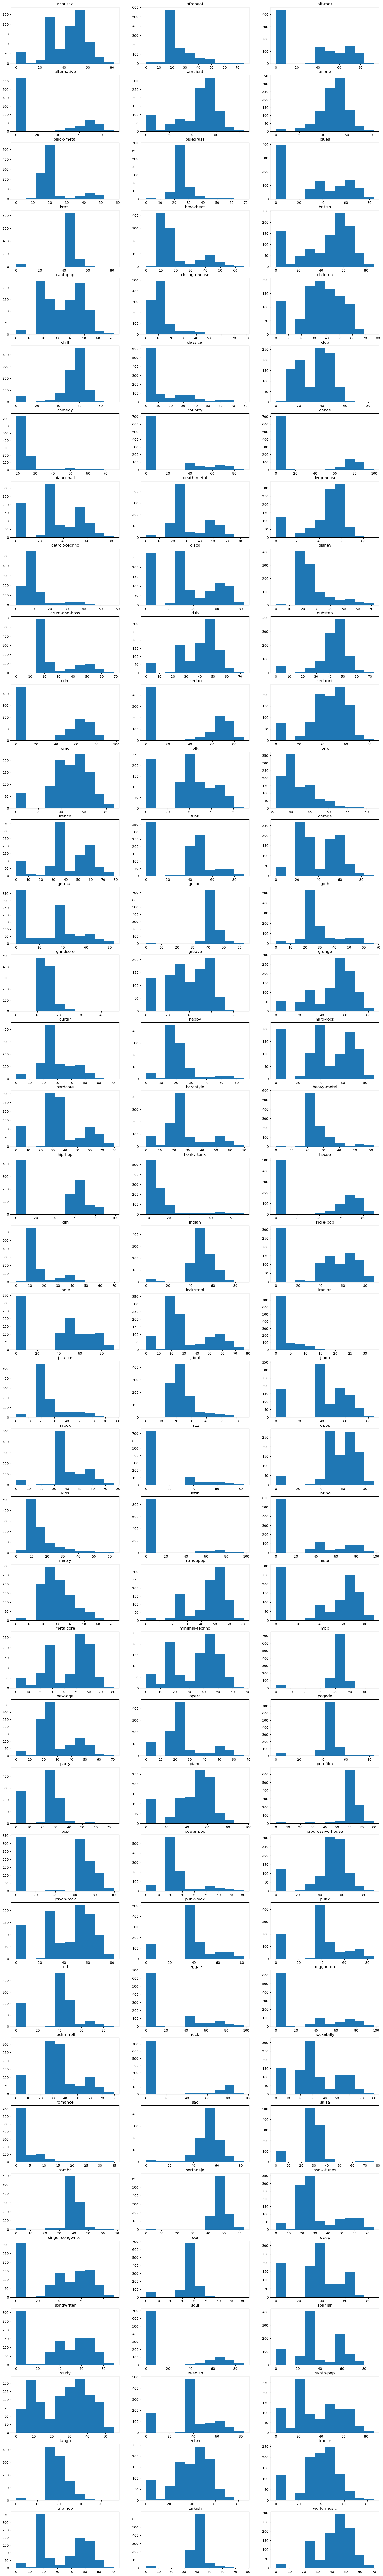

In [50]:
plt.figure()
plt.subplots(38,3,figsize=(20,140))

for x in tqdm(range(114)):
    plt.subplot(38,3,x+1)
    
    plt.title(df['track_genre'].unique()[x])
    
    plt.hist(df[df['track_genre'] == df['track_genre'].unique()[x]]['popularity'], bins=10)
    
    
plt.show()    

In [32]:
g_already = df['track_genre'].unique()

In [31]:
total_genres = ['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime', 'black-metal', 'bluegrass', 'blues', 'bossanova', 'brazil', 'breakbeat', 'british', 'cantopop', 'chicago-house', 'children', 'chill', 'classical', 'club', 'comedy', 'country', 'dance', 'dancehall', 'death-metal', 'deep-house', 'detroit-techno', 'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk', 'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'holidays', 'honky-tonk', 'house', 'idm', 'indian', 'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino', 'malay', 'mandopop', 'metal', 'metal-misc', 'metalcore', 'minimal-techno', 'movies', 'mpb', 'new-age', 'new-release', 'opera', 'pagode', 'party', 'philippines-opm', 'piano', 'pop', 'pop-film', 'post-dubstep', 'power-pop', 'progressive-house', 'psych-rock', 'punk', 'punk-rock', 'r-n-b', 'rainy-day', 'reggae', 'reggaeton', 'road-trip', 'rock', 'rock-n-roll', 'rockabilly', 'romance', 'sad', 'salsa', 'samba', 'sertanejo', 'show-tunes', 'singer-songwriter', 'ska', 'sleep', 'songwriter', 'soul', 'soundtracks', 'spanish', 'study', 'summer', 'swedish', 'synth-pop', 'tango', 'techno', 'trance', 'trip-hop', 'turkish', 'work-out', 'world-music']


In [48]:
t = list(g_already.copy())
final_list = []
for x in total_genres:
    if x not in g_already:
        final_list.append(x)

In [49]:
final_list

['bossanova',
 'holidays',
 'metal-misc',
 'movies',
 'new-release',
 'philippines-opm',
 'post-dubstep',
 'rainy-day',
 'road-trip',
 'soundtracks',
 'summer',
 'work-out']

In [37]:
list(g_already)

['acoustic',
 'afrobeat',
 'alt-rock',
 'alternative',
 'ambient',
 'anime',
 'black-metal',
 'bluegrass',
 'blues',
 'brazil',
 'breakbeat',
 'british',
 'cantopop',
 'chicago-house',
 'children',
 'chill',
 'classical',
 'club',
 'comedy',
 'country',
 'dance',
 'dancehall',
 'death-metal',
 'deep-house',
 'detroit-techno',
 'disco',
 'disney',
 'drum-and-bass',
 'dub',
 'dubstep',
 'edm',
 'electro',
 'electronic',
 'emo',
 'folk',
 'forro',
 'french',
 'funk',
 'garage',
 'german',
 'gospel',
 'goth',
 'grindcore',
 'groove',
 'grunge',
 'guitar',
 'happy',
 'hard-rock',
 'hardcore',
 'hardstyle',
 'heavy-metal',
 'hip-hop',
 'honky-tonk',
 'house',
 'idm',
 'indian',
 'indie-pop',
 'indie',
 'industrial',
 'iranian',
 'j-dance',
 'j-idol',
 'j-pop',
 'j-rock',
 'jazz',
 'k-pop',
 'kids',
 'latin',
 'latino',
 'malay',
 'mandopop',
 'metal',
 'metalcore',
 'minimal-techno',
 'mpb',
 'new-age',
 'opera',
 'pagode',
 'party',
 'piano',
 'pop-film',
 'pop',
 'power-pop',
 'progressive

## Cleaning

### NaN values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [7]:
df.isna().any()

track_id            False
artists              True
album_name           True
track_name           True
popularity          False
duration_ms         False
explicit            False
danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
time_signature      False
track_genre         False
dtype: bool

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().any()

track_id            False
artists             False
album_name          False
track_name          False
popularity          False
duration_ms         False
explicit            False
danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
time_signature      False
track_genre         False
dtype: bool

## Duplicates

In [10]:
df.duplicated().sum()

450

450 Exact duplicates

In [11]:
df.drop(columns=['track_genre']).duplicated().sum()

23539

23539 songs duplicated when genre and category are dropped.

This mean that those are songs that are either exact duplicates or songs recorded across multiple entries as they have multiple genres associated to them.

In [12]:
#dropping exact duplicates
df.drop_duplicates(inplace=True)

In [13]:
df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [14]:
#same songs but multiple genres (might or might not drop)
df.drop(columns=['track_genre']).duplicated().sum()

23089

COunt vectorize the multi-genre songs

In [15]:
#sanity check
df.duplicated(subset = ['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']).sum()

23089

In [16]:
#dropping the songs that are across multiple genres (one song to one genre only)
df.drop_duplicates(subset = ['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],inplace=True)

In [17]:
#sanity check
df.duplicated(subset = ['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']).sum()

0

In [18]:
df.shape

(90460, 20)

## Transforming

In [19]:
# Forming the track_category column
df['track_category'] = None
for x in genre_categories_dict.keys():
    df['track_category'] = np.where(df['track_genre'].isin(genre_categories_dict[x]), x, df['track_category'])

In [20]:
# Making the track_category int
df['track_category'] = df['track_category'].astype(int)

In [21]:
# Making explicit column a binary column
df['explicit'] = np.where(df['explicit'], 1, 0)

In [22]:
#Circular encoding the Key column

# Define the circular encoding function
def circular_encode(value, max_value):
    sin_value = np.sin(2 * np.pi * value / max_value)
    cos_value = np.cos(2 * np.pi * value / max_value)
    return sin_value, cos_value

# Apply the function to the key column of your DataFrame
max_value = 11  # maximum value in the key column
df[['key_sin', 'key_cos']] = df['key'].apply(circular_encode, max_value=max_value).apply(pd.Series)

## One Hot Encoding

In [23]:
#OHE
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

# Fit and transform the 'track_category' column
encoded = encoder.fit_transform(df[['track_category']])

# Convert the encoded sparse matrix to a dense DataFrame
df_encoded = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names())
df_encoded

/Users/ounnuqul/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,x0_8,x0_9,x0_10,...,x0_28,x0_29,x0_30,x0_31,x0_32,x0_33,x0_34,x0_35,x0_36,x0_37
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
90456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
90457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
90458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
df_encoded.shape

(90460, 37)

In [25]:
df.shape

(90460, 23)

In [26]:
df.isna().any()

track_id            False
artists             False
album_name          False
track_name          False
popularity          False
duration_ms         False
explicit            False
danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
time_signature      False
track_genre         False
track_category      False
key_sin             False
key_cos             False
dtype: bool

In [27]:
df_pro = pd.concat([df.reset_index(), df_encoded], axis=1)
#df_pro.drop(columns='track_category',inplace=True)

## First model

In [28]:
df_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90460 entries, 0 to 90459
Data columns (total 61 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             90460 non-null  int64  
 1   track_id          90460 non-null  object 
 2   artists           90460 non-null  object 
 3   album_name        90460 non-null  object 
 4   track_name        90460 non-null  object 
 5   popularity        90460 non-null  int64  
 6   duration_ms       90460 non-null  int64  
 7   explicit          90460 non-null  int64  
 8   danceability      90460 non-null  float64
 9   energy            90460 non-null  float64
 10  key               90460 non-null  int64  
 11  loudness          90460 non-null  float64
 12  mode              90460 non-null  int64  
 13  speechiness       90460 non-null  float64
 14  acousticness      90460 non-null  float64
 15  instrumentalness  90460 non-null  float64
 16  liveness          90460 non-null  float6

In [29]:
df_pro.drop(columns=['index','key','track_genre','track_category','track_id','artists','album_name','track_name'], inplace=True)

In [30]:
df_pro.shape

(90460, 53)

In [31]:
df_pro.isna().sum()

popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
key_sin             0
key_cos             0
x0_1                0
x0_2                0
x0_3                0
x0_4                0
x0_5                0
x0_6                0
x0_7                0
x0_8                0
x0_9                0
x0_10               0
x0_11               0
x0_12               0
x0_13               0
x0_14               0
x0_15               0
x0_16               0
x0_17               0
x0_18               0
x0_19               0
x0_20               0
x0_21               0
x0_22               0
x0_23               0
x0_24               0
x0_25               0
x0_26               0
x0_27               0
x0_28               0
x0_29               0
x0_30     

In [32]:
df_pro.isna().sum().sum()

0

In [33]:
df_pro.select_dtypes(exclude='number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90460 entries, 0 to 90459
Empty DataFrame

### Downsampling 0 popularity

In [34]:
from sklearn.utils import resample

In [35]:
np.median(df['popularity'])

33.0

In [39]:
df_classified.shape

(90460, 53)

In [38]:
df_classified = df_pro.copy()

In [40]:
# class 0 = under median value of popularity, class 1 = over
df_classified['popularity'] = np.where(df_classified['popularity'] > np.median(df_classified['popularity']), 1, 0)

In [41]:
#downsampling split 1
X = df_classified.drop(columns='popularity')
y = df_classified['popularity']

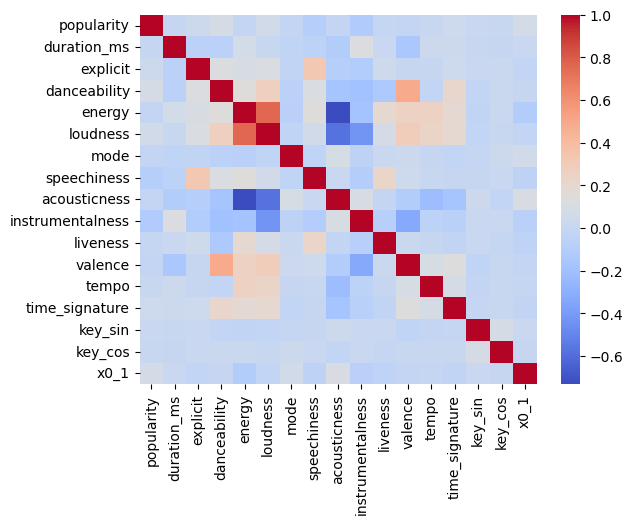

In [42]:
import seaborn as sns
sns.heatmap(df_classified.iloc[:,:17].corr(), cmap='coolwarm')
plt.show()

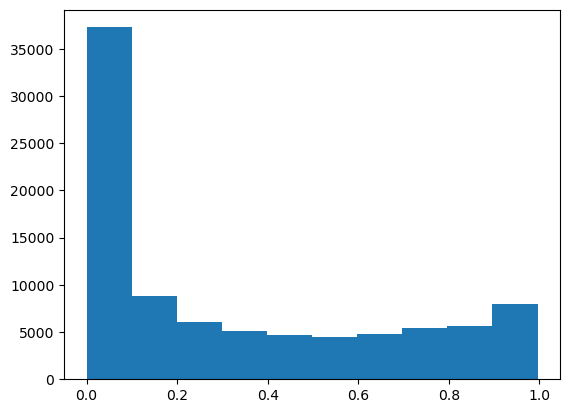

In [114]:
plt.hist(df_classified['acousticness'])
plt.show()

<Figure size 640x480 with 0 Axes>

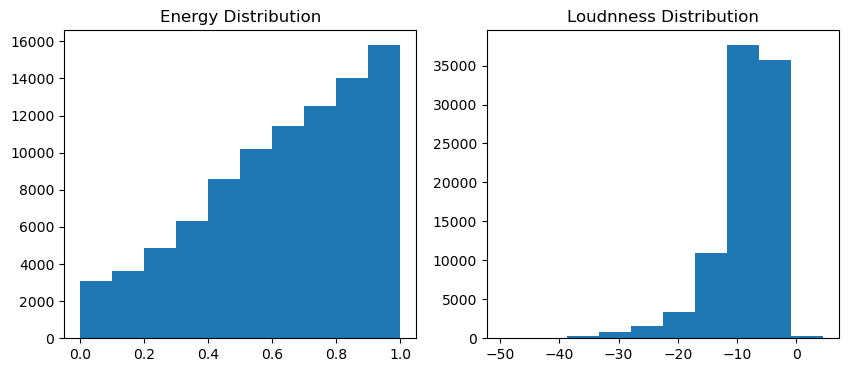

In [110]:
plt.figure()

plt.subplots(1,2, figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(df_classified['energy'])
plt.title('Energy Distribution')

plt.subplot(1,2,2)
plt.hist(df_classified['loudness'])
plt.title('Loudnness Distribution')

plt.show()

# dropping loudness is more desirable than dropping energy for the purpose of reduce multi-colinearity. 
# It has higher correlation with more things, and

In [44]:
#downsampling split 1, remove multi-colinearity 
X = df_classified.drop(columns=['popularity','acousticness','loudness'])
y = df_classified['popularity']

In [45]:
X_downsampled, y_downsampled = resample(X[y == 0], # non-fraud samples
                                        y[y == 0], 
                                        replace=False, 
                                        n_samples=39000, ### 28230 is the half the data set - the amount of zeroes i would like to remove
                                        random_state=123)

In [46]:
X_bal_1 = np.vstack((X[y == 1], X_downsampled))
y_bal_1 = np.hstack((y[y == 1], y_downsampled))

X_bal_1 = pd.DataFrame(X_bal_1, columns=X.columns)
#y_bal_1 = pd.DataFrame(y_bal_1, columns=['popularity'])

In [162]:
#sanity check
#sns.heatmap(X_bal_1.corr(), cmap='coolwarm')
#plt.show()

In [ ]:
#y_bal_1.value_counts()

box plots of features for class 0 and 1 side by side

In [47]:
pd.DataFrame(y_bal_1).value_counts(normalize=True)

1    0.536079
0    0.463921
dtype: float64

In [49]:
X_remainder, X_test, y_remainder, y_test = train_test_split(X_bal_1, y_bal_1, test_size=0.33,stratify=y_bal_1, random_state=42)

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()
X_remainder_ss = scaler.fit_transform(X_remainder)
X_test_ss = scaler.transform(X_test)

In [55]:
from sklearn.model_selection import cross_val_score

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [53]:
logit = LogisticRegression().fit(X_remainder_ss,y_remainder)

In [56]:
np.mean(cross_val_score(logit, X_remainder_ss, y_remainder, cv=5))

0.6804915210905661

In [57]:
X_remainder_ss.shape

(56324, 50)

In [58]:
confusion_matrix(logit.predict(X_remainder_ss),y_remainder)

array([[16104,  7910],
       [10026, 22284]])

In [62]:
#trying to put back orginal popularity scores in order to try regression again
X_remainder['og_pop'] = None
X_remainder['og_pop'] = np.where(X_remainder['track_id'] == df['track_id'], df['popularity'], None)

KeyError: 'track_id'

In [39]:
# class 0 = under 50 value of popularity, class 1 = over
df_classified['popularity'] = np.where(df_classified['Popularity'] > 50, 1, 0)

In [38]:
#downsampling split 2
X = df_classified.drop(columns='popularity')
y = df_classified['popularity']

### Linear Regression

In [38]:
#model 1 
X = df_pro.drop(columns='popularity')
y = df_pro['popularity']

In [236]:
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [237]:
scaler = StandardScaler()
X_remainder_ss = scaler.fit_transform(X_remainder)
X_test_ss = scaler.transform(X_test)

In [238]:
linreg = LinearRegression().fit(X_remainder_ss,y_remainder)

In [242]:
np.mean(cross_val_score(linreg, X_remainder_ss, y_remainder, cv=5))

0.14837022217801835

### Logistic Regression

In [273]:
#model 2
X = df_pro.drop(columns='popularity')
y = df_pro['popularity']

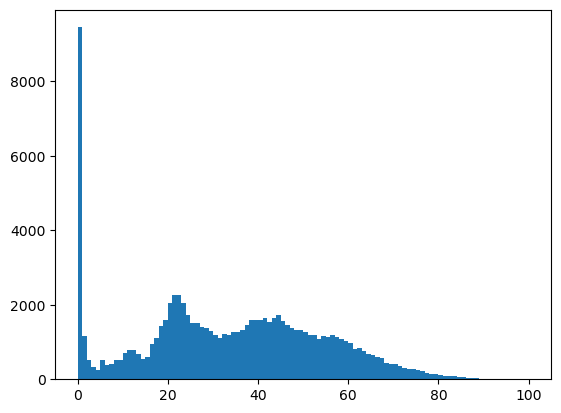

In [274]:
plt.hist(y,bins=100)
plt.show()

Dashboard: play button for the song being analyzed.

In [261]:
y = np.where(y > 50, 1, 0)

In [268]:
pd.DataFrame(y).value_counts(normalize=True)

0    0.777316
1    0.222684
dtype: float64

In [262]:
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [263]:
scaler = StandardScaler()
X_remainder_ss = scaler.fit_transform(X_remainder)
X_test_ss = scaler.transform(X_test)

In [254]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [264]:
logit = LogisticRegression().fit(X_remainder_ss,y_remainder)

In [265]:
np.mean(cross_val_score(logit, X_remainder_ss, y_remainder, cv=5))

0.7847478637591221

In [266]:
X_remainder_ss.shape

(60608, 52)

In [267]:
confusion_matrix(logit.predict(X_remainder_ss),y_remainder)

array([[45807, 11702],
       [ 1303,  1796]])